Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import collections
import re

Load the csv file and make a copy to keep the original file for comparisons.

In [6]:
df_original = pd.read_csv('sample_data.csv')
df = df_original.copy()

# **Dataset Overview**

In [7]:
df.head()

,AccountSessionIdentifier,Account_Domain,Account_Name,ActivityID,AuthenticationProvider,AuthenticationServer,AuthenticationType,CalledStationID,CallerProcessName,Caller_Computer_Name,...,tag::object_category,user,user_group,user_group_id,user_id,user_name,user_type,vendor,vendor_privilege,vendor_product
0,3635303236,NaN,NaN,'{9f05da3d-972e-0001-1cdb-059f2e97db01}',Windows,FIS-RODCHCM-02.fsoft.fpt.vn,MS-CHAPv2,10.86.34.14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft,NaN,Microsoft Windows
1,3339323731,NaN,NaN,'{9f05da3d-972e-0001-1cdb-059f2e97db01}',Windows,FIS-RODCHCM-02.fsoft.fpt.vn,MS-CHAPv2,10.86.34.13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft,NaN,Microsoft Windows
2,3635303235,NaN,NaN,'{9f05da3d-972e-0001-1cdb-059f2e97db01}',Windows,FIS-RODCHCM-02.fsoft.fpt.vn,MS-CHAPv2,10.86.34.14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft,NaN,Microsoft Windows
3,3635303234,NaN,NaN,'{9f05da3d-972e-0001-1cdb-059f2e97db01}',Windows,FIS-RODCHCM-02.fsoft.fpt.vn,MS-CHAPv2,10.86.34.14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft,NaN,Microsoft Windows
4,3635303233,NaN,NaN,'{9f05da3d-972e-0001-1cdb-059f2e97db01}',Windows,FIS-RODCHCM-02.fsoft.fpt.vn,MS-CHAPv2,10.86.34.14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft,NaN,Microsoft Windows


In [8]:
print("Number of records and variables:")
print(df.shape)

Number of records and variables:
(1030, 190)


In [9]:
print("Data type of each variable:")
print(df.dtypes)

Data type of each variable:
AccountSessionIdentifier      int64
Account_Domain              float64
Account_Name                float64
ActivityID                   object
AuthenticationProvider       object
                             ...   
user_name                   float64
user_type                   float64
vendor                       object
vendor_privilege            float64
vendor_product               object
Length: 190, dtype: object


## **Deduplicate Column Names**

In [10]:
def deduplicate_columns(columns):
    """Deduplicate column names for compatibility."""
    counter = collections.Counter()
    new_cols = []
    seen = set()
    for col in columns:
        col = str(col).strip().lower()
        col = re.sub(r'[^a-zA-Z0-9]', '_', col)
        if not col:
            col = 'unnamed'
        base_col = col
        suffix = counter[base_col]
        while col in seen:
            suffix += 1
            col = f"{base_col}_{suffix}"
        counter[base_col] += 1
        seen.add(col)
        new_cols.append(col)
    return new_cols

In [11]:
df.columns = deduplicate_columns(df.columns)
print(f"Deduplicated columns: {list(df.columns)}")

Deduplicated columns: ['accountsessionidentifier', 'account_domain', 'account_name', 'activityid', 'authenticationprovider', 'authenticationserver', 'authenticationtype', 'calledstationid', 'callerprocessname', 'caller_computer_name', 'caller_domain', 'caller_logon_id', 'caller_machine_name', 'caller_user_name', 'callingstationid', 'categorystring', 'change_type', 'channel', 'clientipaddress', 'clientname', 'client_address', 'client_domain', 'client_logon_id', 'client_machine_name', 'client_user_name', 'computer', 'computername', 'description', 'domain', 'eaptype', 'error_code', 'eventcode', 'eventdata_xml', 'eventid', 'eventrecordid', 'filename', 'fullyqualifiedsubjectmachinename', 'fullyqualifiedsubjectusername', 'group_domain', 'group_name', 'group_type_change', 'guid', 'image_file_name', 'ipaddress', 'ipport', 'keyfilepath', 'keywords', 'level', 'logfilecleared_xml', 'loggingresult', 'logontype', 'logon_account', 'logon_id', 'logon_account_2', 'membername', 'member_id', 'member_nam

# **Dropping Columns**

## **No Variance Columns**
No variance columns mean columns that have the same values on every entries.

In [12]:
dup_cols = [col for col in df.columns if df[col].nunique(dropna=False) == 1]

print("Columns with no variance:")
print(dup_cols)

Columns with no variance:
['account_domain', 'account_name', 'activityid', 'authenticationprovider', 'authenticationserver', 'authenticationtype', 'callerprocessname', 'caller_computer_name', 'caller_domain', 'caller_logon_id', 'caller_machine_name', 'categorystring', 'change_type', 'channel', 'client_address', 'client_domain', 'client_logon_id', 'client_machine_name', 'client_user_name', 'computer', 'computername', 'description', 'domain', 'eaptype', 'error_code', 'eventcode', 'eventid', 'filename', 'fullyqualifiedsubjectmachinename', 'group_domain', 'group_name', 'group_type_change', 'guid', 'image_file_name', 'ipaddress', 'ipport', 'keyfilepath', 'keywords', 'level', 'logfilecleared_xml', 'loggingresult', 'logontype', 'logon_account', 'logon_id', 'logon_account_2', 'membername', 'member_id', 'member_name', 'message', 'nasipv6address', 'nasporttype', 'name', 'networkpolicyname', 'new_account_name', 'new_domain', 'objectname', 'opcode', 'primary_domain', 'primary_user_name', 'privileg

In [13]:
df = df.drop(columns=dup_cols)

## **High Correlation Columns**

In [14]:
def visualize_correlation_matrix(df, threshold=0.7):
    """
    A simplified function to visualize correlation matrix for numerical columns

    Parameters:
    -----------
    df : pandas DataFrame
        The input DataFrame
    threshold : float, default=0.7
        Correlation threshold to highlight
    """
    # Get only numeric columns
    numeric_df = df.select_dtypes(include=['number'])

    # Check if we have enough numeric columns
    if numeric_df.shape[1] < 2:
        print("Not enough numeric columns for correlation analysis.")
        return

    # Calculate correlation matrix
    corr_matrix = numeric_df.corr()

    # Create plot
    plt.figure(figsize=(10, 8))

    # Create heatmap
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        vmin=-1, vmax=1,
        linewidths=0.5,
        cbar_kws={"label": "Correlation"}
    )

    # Add title and adjust appearance
    plt.title('Correlation Matrix', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print highly correlated pairs
    print(f"Strongly correlated pairs (|correlation| >= {threshold}):")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                print(f" - {corr_matrix.columns[i]} & {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.2f}")

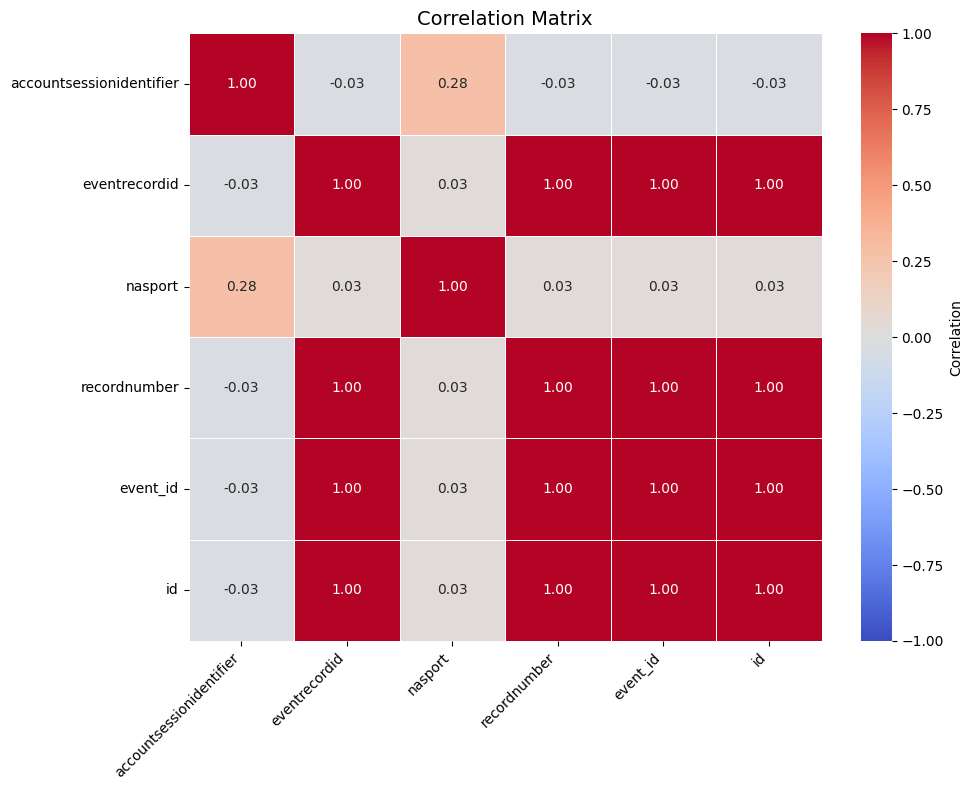

Strongly correlated pairs (|correlation| >= 0.95):
 - recordnumber & eventrecordid: 1.00
 - event_id & eventrecordid: 1.00
 - event_id & recordnumber: 1.00
 - id & eventrecordid: 1.00
 - id & recordnumber: 1.00
 - id & event_id: 1.00


In [15]:
corr_matrix = visualize_correlation_matrix(df, threshold=0.95)

In [16]:
df = df.drop(['recordnumber', 'event_id', 'id'], axis=1)

## **Duplicate Columns**

In [17]:
def group_equal_object_columns(df):
    # Get only the object columns
    object_columns = df.select_dtypes(include=['object']).columns.tolist()

    if len(object_columns) < 2:
        return "Less than 2 object columns found"

    # Initialize groups
    groups = []
    processed_columns = set()

    # Process each column
    for col1 in object_columns:
        # Skip if we've already processed this column
        if col1 in processed_columns:
            continue

        # Start a new group with this column
        current_group = [col1]
        processed_columns.add(col1)

        # Compare with all other unprocessed columns
        for col2 in object_columns:
            if col2 in processed_columns:
                continue

            # Check if columns are equal (handling NaN values)
            is_equal = ((df[col1] == df[col2]) |
                       (pd.isna(df[col1]) & pd.isna(df[col2]))).all()

            if is_equal:
                current_group.append(col2)
                processed_columns.add(col2)

        # Add this group to our results
        if len(current_group) > 0:
            groups.append(current_group)

    # Format results nicely
    results = []
    for group in groups:
        if len(group) > 1:
            first_col = group[0]
            other_cols = group[1:]
            results.append(f"Column '{first_col}' equals to columns {other_cols}")
        else:
            results.append(f"Column '{group[0]}' is unique")

    return results

In [18]:
equality_groups = group_equal_object_columns(df)
for result in equality_groups:
    print(result)

Column 'calledstationid' equals to columns ['clientipaddress', 'nasipv4address']
Column 'caller_user_name' equals to columns ['subjectusername', 'src_user']
Column 'callingstationid' is unique
Column 'clientname' is unique
Column 'eventdata_xml' is unique
Column 'fullyqualifiedsubjectusername' is unique
Column 'nasidentifier' is unique
Column 'subjectusersid' is unique
Column 'systemtime' is unique
Column 'system_props_xml' is unique
Column 'threadid' is unique
Column '_raw' is unique
Column '_time' is unique


In [19]:
df = df.drop(['clientipaddress', 'nasipv4address', 'caller_user_name', 'src_user'], axis=1)

## **Noisy Columns**

In [20]:
def detect_noisy_columns(file_path):
    """
    Load CSV data and automatically detect XML/noisy columns
    without hardcoding any specific column names.

    Args:
        file_path: Path to the CSV file
    Returns:
        tuple: (DataFrame, list of detected noisy columns)
    """

    # Track columns with noisy content
    noisy_columns = []

    for col in df.columns:
        if df[col].dtype == object:  # Only check text columns
            # Convert to string in case we have non-string objects
            sample_values = df[col].astype(str).dropna().head(50)

            if len(sample_values) == 0:
                continue

            # Calculate metrics for this column
            avg_length = sample_values.str.len().mean()

            # Check for XML patterns (opening/closing tags or XML declarations)
            xml_pattern = re.compile(r'<[^>]+>|<\?xml')
            xml_matches = sum(sample_values.apply(lambda x: bool(xml_pattern.search(x))))
            xml_ratio = xml_matches / len(sample_values) if len(sample_values) > 0 else 0

            # Check for very long text
            is_long_text = avg_length > 500

            # Special character density (brackets, quotes, etc.)
            special_char_pattern = re.compile(r'[<>{}[\]"\'=:]')
            special_char_density = sample_values.apply(
                lambda x: len(special_char_pattern.findall(x)) / len(x) if len(x) > 0 else 0
            ).mean()

            # Decision to flag based on combined metrics
            if (xml_ratio > 0.3 or              # Has XML content
                (is_long_text and special_char_density > 0.05) or  # Long text with many special chars
                avg_length > 1000):             # Extremely long text
                noisy_columns.append(col)

    print(f"Noisy columns: {noisy_columns}")

    return df, noisy_columns

In [21]:
df, noisy_cols = detect_noisy_columns(df)

Noisy columns: ['eventdata_xml', 'system_props_xml', '_raw']


In [22]:
df = df.drop(columns=noisy_cols)

# **Missing Values & Duplicates Detection**

In [23]:
print("Missing values per variable:")
missing_values = df.isnull().sum()
print(missing_values)

Missing values per variable:
accountsessionidentifier         0
calledstationid                  0
callingstationid                 0
clientname                       0
eventrecordid                    0
fullyqualifiedsubjectusername    0
nasidentifier                    0
nasport                          0
subjectusername                  0
subjectusersid                   0
systemtime                       0
threadid                         0
_time                            0
dtype: int64


In [24]:
print("Amount of duplicates found:")
duplicates = df.duplicated().sum()
print(duplicates)

Amount of duplicates found:
0


# **Dataset Overview after Cleaning**

In [25]:
df.head()

,accountsessionidentifier,calledstationid,callingstationid,clientname,eventrecordid,fullyqualifiedsubjectusername,nasidentifier,nasport,subjectusername,subjectusersid,systemtime,threadid,_time
0,3635303236,10.86.34.14,113.174.18.186,VPN-34.14,141312289,fsoft.fpt.vn/FPT/FIS/FIS HCM/FIS GS HCM/GS GOV...,HO-L2TP,264,huyhk8,S-1-5-21-1078879581-106171156-1039276024-927883,'2025-04-01T07:24:07.7813455Z','10208',2025-04-01T14:24:07.000+0700
1,3339323731,10.86.34.13,14.233.37.124,VPN-34.13,141312239,fsoft.fpt.vn/FPT/FIS/FIS HCM/FIS GS HCM/GS GOV...,HO-L2TP03,149,nhalt8,S-1-5-21-1078879581-106171156-1039276024-929201,'2025-04-01T07:23:27.5756462Z','10172',2025-04-01T14:23:27.000+0700
2,3635303235,10.86.34.14,103.199.33.4,VPN-34.14,141312221,fsoft.fpt.vn/FPT/FIS/FPT IS HCM/FIS BNKHCM/BNK...,HO-L2TP,253,ThangNH29,S-1-5-21-1078879581-106171156-1039276024-963688,'2025-04-01T07:23:02.3227246Z','904',2025-04-01T14:23:02.000+0700
3,3635303234,10.86.34.14,113.185.86.130,VPN-34.14,141312079,fsoft.fpt.vn/FPT/FIS/NEW_USERS/ThaoBTP11,HO-L2TP,28,thaobtp11,S-1-5-21-1078879581-106171156-1039276024-1212216,'2025-04-01T07:21:02.5495963Z','8440',2025-04-01T14:21:02.000+0700
4,3635303233,10.86.34.14,21.141.130.220,VPN-34.14,141312068,fsoft.fpt.vn/FPT/FIS/FPT IS HCM/FIS HC HCM/HC ...,HO-L2TP,270,hungnv103,S-1-5-21-1078879581-106171156-1039276024-963543,'2025-04-01T07:20:53.3688777Z','10172',2025-04-01T14:20:53.000+0700


In [26]:
print("Number of records and variables after deleting:")
print(df.shape)

Number of records and variables after deleting:
(1030, 13)


In [27]:
print("Missing values per variable:")
missing_values = df.isnull().sum()
print(missing_values)

Missing values per variable:
accountsessionidentifier         0
calledstationid                  0
callingstationid                 0
clientname                       0
eventrecordid                    0
fullyqualifiedsubjectusername    0
nasidentifier                    0
nasport                          0
subjectusername                  0
subjectusersid                   0
systemtime                       0
threadid                         0
_time                            0
dtype: int64


In [28]:
print("Data type of each variable:")
print(df.dtypes)

Data type of each variable:
accountsessionidentifier          int64
calledstationid                  object
callingstationid                 object
clientname                       object
eventrecordid                     int64
fullyqualifiedsubjectusername    object
nasidentifier                    object
nasport                           int64
subjectusername                  object
subjectusersid                   object
systemtime                       object
threadid                         object
_time                            object
dtype: object


# **Formatting Columns**

## **'timestamps' Columns**

Check the current format of timestamp columns

In [29]:
print("Timestamp columns - before formatting:")
print("\nSystemTime - first 3 values:")
print(df['systemtime'].head(3))
print("\n_time - first 3 values:")
print(df['_time'].head(3))

Timestamp columns - before formatting:

SystemTime - first 3 values:
0    '2025-04-01T07:24:07.7813455Z'
1    '2025-04-01T07:23:27.5756462Z'
2    '2025-04-01T07:23:02.3227246Z'
Name: systemtime, dtype: object

_time - first 3 values:
0    2025-04-01T14:24:07.000+0700
1    2025-04-01T14:23:27.000+0700
2    2025-04-01T14:23:02.000+0700
Name: _time, dtype: object


Remove quotes from SystemTime if it's a string type column

In [30]:
if df['systemtime'].dtype == 'object':
    df['systemtime'] = df['systemtime'].str.replace("'", "")

Convert both columns to datetime

In [31]:
df['systemtime'] = pd.to_datetime(df['systemtime'], errors='coerce')
df['_time'] = pd.to_datetime(df['_time'], errors='coerce')

Convert both to UTC+7

In [32]:
df['systemtime'] = df['systemtime'] + pd.Timedelta(hours=7)
# _time is already in the correct timezone

Format both with time zone marker

In [33]:
df['systemtime'] = df['systemtime'].dt.strftime('%Y-%m-%d %H:%M:%S') + '+07:00'
df['_time'] = df['_time'].dt.strftime('%Y-%m-%d %H:%M:%S') + '+07:00'

Check if they're equal using numpy

In [34]:
are_equal = np.array_equal(df['systemtime'].values, df['_time'].values)
print(are_equal)

True


They're identical, so just use one column

In [35]:
df = df.drop(['systemtime'], axis=1)

# Modify the name
df['timestamp'] = df['_time']

# Drop _time
df = df.drop(['_time'], axis=1)


Check the results

In [36]:
print("Timestamp column - after formatting:")
print(df['timestamp'].head())

Timestamp column - after formatting:
0    2025-04-01 14:24:07+07:00
1    2025-04-01 14:23:27+07:00
2    2025-04-01 14:23:02+07:00
3    2025-04-01 14:21:02+07:00
4    2025-04-01 14:20:53+07:00
Name: timestamp, dtype: object


### **Feature Extraction**

Extract hour for time analysis (temporary string manipulation for the datetime conversion)

In [37]:
df['hour_of_day'] = pd.to_datetime(df['timestamp'].str.replace('\\+07:00', '')).dt.hour

# Create time category for analysis
df['time_category'] = pd.cut(
    df['hour_of_day'],
    bins=[0, 6, 12, 18, 24],
    labels=['night_(0-6)', 'morning_(6-12)', 'afternoon_(12-18)', 'evening_(18-24)']
)

In [38]:
print(df['timestamp'].head(5), "\n")
print(df['hour_of_day'].head(5), "\n")
print(df['time_category'].head(5))

0    2025-04-01 14:24:07+07:00
1    2025-04-01 14:23:27+07:00
2    2025-04-01 14:23:02+07:00
3    2025-04-01 14:21:02+07:00
4    2025-04-01 14:20:53+07:00
Name: timestamp, dtype: object 

0    14
1    14
2    14
3    14
4    14
Name: hour_of_day, dtype: int32 

0    afternoon_(12-18)
1    afternoon_(12-18)
2    afternoon_(12-18)
3    afternoon_(12-18)
4    afternoon_(12-18)
Name: time_category, dtype: category
Categories (4, object): ['night_(0-6)' < 'morning_(6-12)' < 'afternoon_(12-18)' < 'evening_(18-24)']


## **'username' Columns**

Check the current format of username column

In [39]:
print("Username column - before formatting:")
print(df['subjectusername'].head(10))

Username column - before formatting:
0           huyhk8
1           nhalt8
2        ThangNH29
3        thaobtp11
4        hungnv103
5         HieuVM26
6    SonHG@fpt.com
7          dungndm
8    SonHG@fpt.com
9          sonth28
Name: subjectusername, dtype: object


Define a function to clean the username

In [40]:
def clean_username(username):
    if pd.isna(username):
        return username

    # Extract just the username from email format if present
    if isinstance(username, str) and '@' in username:
        username = username.split('@')[0]

    return username

In [41]:
df['subjectusername'] = df['subjectusername'].apply(clean_username)

Check the results

In [42]:
print("Username column - after formatting:")
print(df['subjectusername'].head(10))

Username column - after formatting:
0       huyhk8
1       nhalt8
2    ThangNH29
3    thaobtp11
4    hungnv103
5     HieuVM26
6        SonHG
7      dungndm
8        SonHG
9      sonth28
Name: subjectusername, dtype: object


## **'department' Columns**

In [43]:
print("Department column:")
print(df['fullyqualifiedsubjectusername'].head(10))

Department column:
0    fsoft.fpt.vn/FPT/FIS/FIS HCM/FIS GS HCM/GS GOV...
1    fsoft.fpt.vn/FPT/FIS/FIS HCM/FIS GS HCM/GS GOV...
2    fsoft.fpt.vn/FPT/FIS/FPT IS HCM/FIS BNKHCM/BNK...
3             fsoft.fpt.vn/FPT/FIS/NEW_USERS/ThaoBTP11
4    fsoft.fpt.vn/FPT/FIS/FPT IS HCM/FIS HC HCM/HC ...
5    fsoft.fpt.vn/FPT/FIS/FPT IS HCM/FIS BNKHCM/BNK...
6    fsoft.fpt.vn/FPT/FIS/FIS HCM/FIS ES HCM/ES PB1...
7    fsoft.fpt.vn/FPT/FIS/FPT IS HCM/FIS BNKHCM/BNK...
8    fsoft.fpt.vn/FPT/FIS/FIS HCM/FIS ES HCM/ES PB1...
9               fsoft.fpt.vn/FPT/FIS/NEW_USERS/SonTH28
Name: fullyqualifiedsubjectusername, dtype: object


### **Feature Extraction**

In [44]:
def extract_department(full_name):
    if pd.isna(full_name) or not isinstance(full_name, str):
        return None

    # Split by slashes
    parts = full_name.split('/')

    # Extract FIS HCM (usually the fourth part)
    dept = parts[3] if len(parts) > 3 else None

    return dept

Apply the extraction and create new department column

In [45]:
df['department'] = df['fullyqualifiedsubjectusername'].apply(extract_department)

In [46]:
print(df['department'].head(10))

0       FIS HCM
1       FIS HCM
2    FPT IS HCM
3     NEW_USERS
4    FPT IS HCM
5    FPT IS HCM
6       FIS HCM
7    FPT IS HCM
8       FIS HCM
9     NEW_USERS
Name: department, dtype: object


# **Dataset After Formatting**

In [47]:
df.head()

,accountsessionidentifier,calledstationid,callingstationid,clientname,eventrecordid,fullyqualifiedsubjectusername,nasidentifier,nasport,subjectusername,subjectusersid,threadid,timestamp,hour_of_day,time_category,department
0,3635303236,10.86.34.14,113.174.18.186,VPN-34.14,141312289,fsoft.fpt.vn/FPT/FIS/FIS HCM/FIS GS HCM/GS GOV...,HO-L2TP,264,huyhk8,S-1-5-21-1078879581-106171156-1039276024-927883,'10208',2025-04-01 14:24:07+07:00,14,afternoon_(12-18),FIS HCM
1,3339323731,10.86.34.13,14.233.37.124,VPN-34.13,141312239,fsoft.fpt.vn/FPT/FIS/FIS HCM/FIS GS HCM/GS GOV...,HO-L2TP03,149,nhalt8,S-1-5-21-1078879581-106171156-1039276024-929201,'10172',2025-04-01 14:23:27+07:00,14,afternoon_(12-18),FIS HCM
2,3635303235,10.86.34.14,103.199.33.4,VPN-34.14,141312221,fsoft.fpt.vn/FPT/FIS/FPT IS HCM/FIS BNKHCM/BNK...,HO-L2TP,253,ThangNH29,S-1-5-21-1078879581-106171156-1039276024-963688,'904',2025-04-01 14:23:02+07:00,14,afternoon_(12-18),FPT IS HCM
3,3635303234,10.86.34.14,113.185.86.130,VPN-34.14,141312079,fsoft.fpt.vn/FPT/FIS/NEW_USERS/ThaoBTP11,HO-L2TP,28,thaobtp11,S-1-5-21-1078879581-106171156-1039276024-1212216,'8440',2025-04-01 14:21:02+07:00,14,afternoon_(12-18),NEW_USERS
4,3635303233,10.86.34.14,21.141.130.220,VPN-34.14,141312068,fsoft.fpt.vn/FPT/FIS/FPT IS HCM/FIS HC HCM/HC ...,HO-L2TP,270,hungnv103,S-1-5-21-1078879581-106171156-1039276024-963543,'10172',2025-04-01 14:20:53+07:00,14,afternoon_(12-18),FPT IS HCM


In [48]:
print("Number of records and variables after deleting:")
print(df.shape)

Number of records and variables after deleting:
(1030, 15)
